In [1]:
import spike_training
from QIF_training import *

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n_par, time_par, train_par, cov_par, run_par = create_default_params()

In [4]:
n_par['net_size'] = 100

In [5]:
time_par['total_time'] = 500

In [6]:
train_par['training_loops'] = 5

In [7]:
trainer = QIF_training(n_par, time_par, train_par, cov_par, run_par)

In [8]:
dir(trainer)

['N',
 'T',
 'W_init',
 'W_trained',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'create_default_params',
 'dr',
 'dt',
 'dtheta',
 'genw_sparse',
 'lam',
 'nloop',
 'plot_spk_rasts',
 'r',
 'rk4_step',
 'run_QIF',
 'run_network',
 'run_time',
 'spk_t',
 'stim_off',
 'stim_on',
 'tau',
 'tau_s',
 'theta',
 'train_QIF',
 'train_every',
 'train_network',
 'u']

In [9]:
def gen_rand_stim(n_par, time_par):
    N = n_par['net_size']
    dt = time_par['dt']
    timesteps = int(time_par['total_time']/dt)
    
    stim = np.zeros((N, timesteps))
    for row in range(N):
        rstim = 2 * sp.stats.uniform.rvs(0, 1) - 1 # random stim weight from -1, 1
        stim[row][int(time_par['stim_on']/dt):int(time_par['stim_off']/dt)] = rstim
    return stim

In [10]:
def gen_sine_targets(N, T, dt): 
    
    timesteps = int(time_par['total_time']/dt)
    targets = np.zeros((N, timesteps))
    for i in range(N):
        amp = sp.stats.uniform.rvs() + 0.5
        t0 = sp.stats.uniform.rvs() * 1000
        t1 = sp.stats.uniform.rvs() * 700 + 300
        x = np.linspace(0, T, num = timesteps)
        targets[i] = np.sin(2 * np.pi * (x - t0)/t1)
    return targets

In [11]:
stim = gen_rand_stim(n_par, time_par)

In [12]:
targs = gen_sine_targets(n_par['net_size'], time_par['total_time'], time_par['dt'])

In [13]:
spks, sdrive, thetas, spk_rast = trainer.train_QIF(stim, targs)

training trial 0
training trial 1
training trial 2
training trial 3
training trial 4


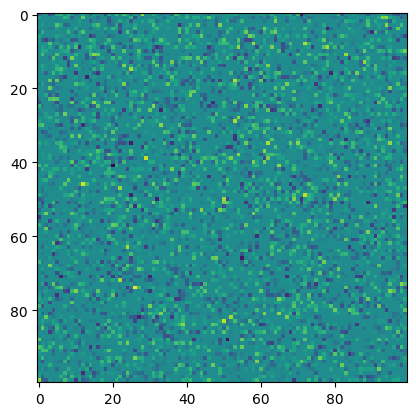

In [14]:
plt.imshow(trainer.W_trained)

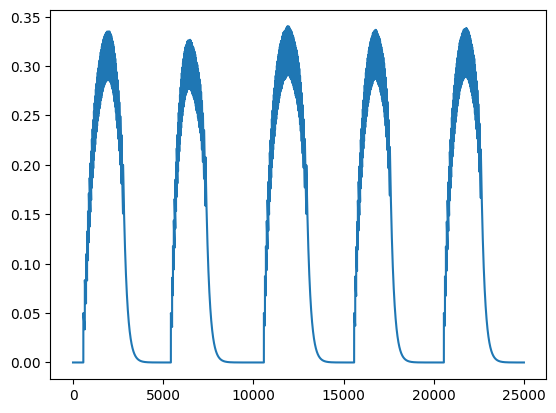

In [14]:
plt.plot(spks[0])

Text(0.5, 1.0, 'Auxillary targets')

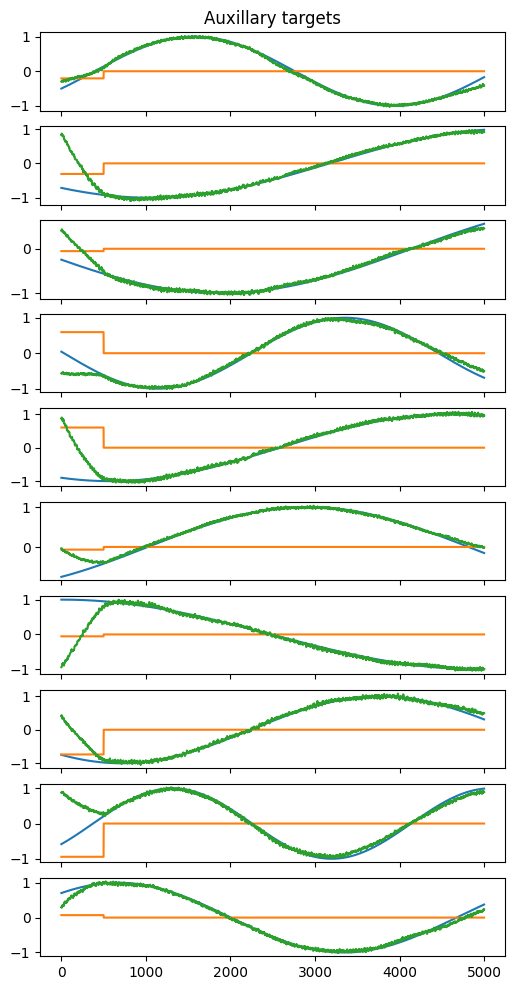

In [15]:
n_plot = 10
nloop = trainer.nloop
T = trainer.T
dt = trainer.dt

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(targs[i])
    axs[i].plot(stim[i])
    axs[i].plot(sdrive[i][(nloop - 1)*int(T/dt):nloop*int(T/dt)])
axs[0].set_title("Auxillary targets")

In [16]:
spks_p, sdrive_p, thetas_p, spk_rast_p = trainer.run_QIF(stim)

Text(0.5, 1.0, 'Behavior after training')

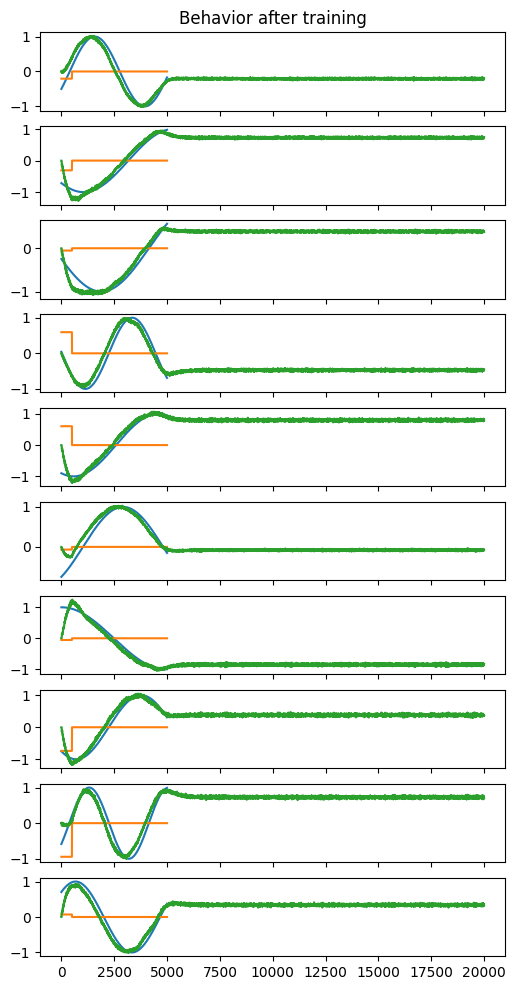

In [18]:
n_plot = 10
nloop = trainer.nloop
T = trainer.T
dt = trainer.dt

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(targs[i])
    axs[i].plot(stim[i])
    axs[i].plot(sdrive_p[i])
axs[0].set_title("Behavior after training")